# References

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

# Imports

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# Inputs (Antecedent) and Outputs (Consequent) Fuzzification

In [2]:
# np.arange(low, high+1, 1)

temperature = ctrl.Antecedent(np.arange(-10, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

speed = ctrl.Consequent(np.arange(0, 21, 1), 'speed')

In [25]:
# automf is for automatic division of range into n descriptor - names can be given for mandotary naming (instead of default names)
temperature_names = ['VVC', 'VC', 'C', 'M', 'H', 'VH', 'VVH']
temperature.automf(names = temperature_names)

humidity_names = ['VL', 'L', 'M', 'H', 'VH']
humidity.automf(names = humidity_names)


speed_names = ['VL', 'L', 'M', 'H', 'VH', 'VVH']
speed.automf(names = speed_names)

# speed['VL'] = fuzz.trimf(speed.universe, [0, 0, 4])
# speed['L'] = fuzz.trimf(speed.universe, [0, 4, 8])
# speed['M'] = fuzz.trimf(speed.universe, [4, 8, 12])
# speed['H'] = fuzz.trimf(speed.universe, [8, 12, 16])
# speed['VH'] = fuzz.trimf(speed.universe, [12, 16, 20])
# speed['VVH'] = fuzz.trimf(speed.universe, [16, 20, 20])

In [37]:
# universe set can be seen by below method
# speed.universe

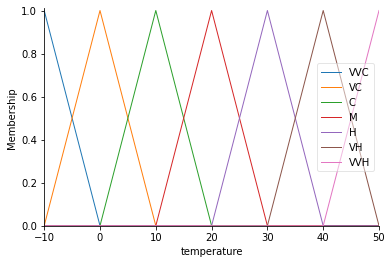

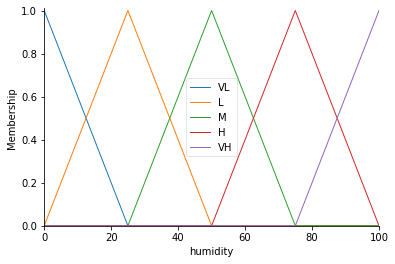

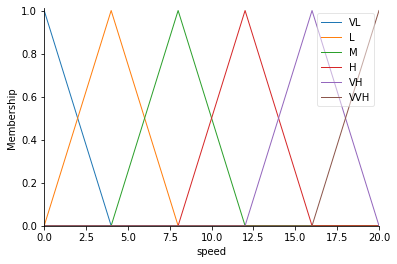

In [38]:
# viewing Membership diagrams
# temperature['average'].view()
temperature.view();
humidity.view();
speed.view();

# Fuzzy rules

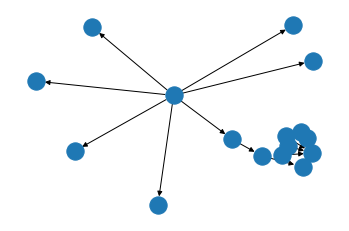

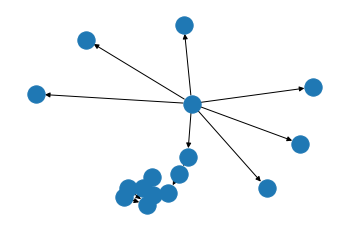

In [39]:
# Defining rules from the given rules in the homework doc by combining them with | (or), & (and) 

rule1 = ctrl.Rule(temperature['VVC'], speed['VL'])
rule2 = ctrl.Rule(temperature['VC'], speed['VL'])
rule3 = ctrl.Rule((temperature['C'] | temperature['M']) & humidity['VL'], speed['L'])
rule4 = ctrl.Rule((temperature['M'] | temperature['H']) & (humidity['M'] | humidity['H']), speed['M'])
rule5 = ctrl.Rule(temperature['H'] & humidity['VH'], speed['H'])
rule6 = ctrl.Rule(temperature['VH'], speed['VH'])
rule7 = ctrl.Rule(temperature['VVH'], speed['VVH'])


# View a network graph of the rules
rule1.view();
rule2.view();

# Control system

In [33]:
# Define the control system
speeding_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

In [40]:
# Simulation object of controlsystem for representation and simulating
speeding = ctrl.ControlSystemSimulation(speeding_ctrl)

# Using the control system

1.3333333333333333


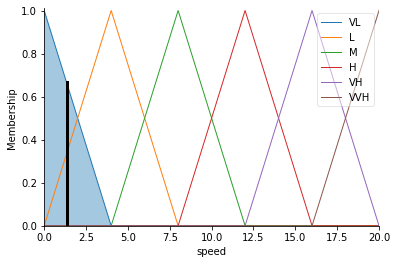

In [43]:
# Providing inputs and computing the output of system for given inputs

speeding.input['temperature'] = 0
speeding.input['humidity'] = 20

speeding.compute()

print(speeding.output['speed'])
speed.view(sim=speeding);

12.04350978467933


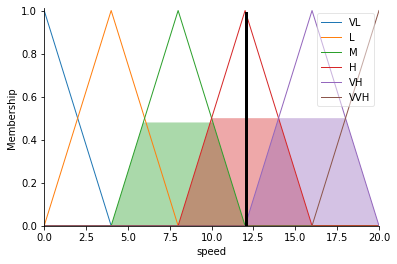

In [44]:
# Providing inputs and computing the output of system for given inputs

speeding.input['temperature'] = 35
speeding.input['humidity'] = 88

speeding.compute()

print(speeding.output['speed'])
speed.view(sim=speeding);